In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Power calculations

In [6]:
def calculate_power_gxg(trait_mean, trait_std, sample_size, maf1, maf2, beta1, beta2, beta_interaction, alpha=5e-8):
    p1, p2 = maf1, maf2
    E_X1, E_X2 = 2 * p1, 2 * p2
    E_X1X2 = 4 * p1 * p2
    Var_X1, Var_X2 = 2 * p1 * (1 - p1), 2 * p2 * (1 - p2)
    Var_X1X2 = 4 * p1 * p2 * (1 + p1 * p2) - E_X1X2**2
    var_trait = trait_std**2
    var_interaction = Var_X1X2 * beta_interaction**2
    ncp = sample_size * var_interaction / var_trait
    critical_value = stats.chi2.ppf(1 - alpha, 1)
    power = 1 - stats.ncx2.cdf(critical_value, df=1, nc=ncp)
    return power

def generate_power_curve_gxg(trait, unit, trait_mean, trait_std, sample_size, maf_list, beta1, beta2, interaction_effects):
    plt.figure(figsize=(12, 8))
    
    # Use a qualitative color palette
    colors = sns.color_palette("Set1", n_colors=len(maf_list))
    
    for maf, color in zip(maf_list, colors):
        powers = [calculate_power_gxg(trait_mean, trait_std, sample_size, maf, maf, beta1, beta2, effect / trait_std) 
                  for effect in interaction_effects]
        plt.plot(interaction_effects, powers, label=f'MAF = {maf}', color=color, linewidth=2)
    
    plt.xlabel(f'Interaction Effect Size for {trait} ({unit})')
    plt.ylabel('Power')
    plt.title(f'Power to Detect GxG Interaction for {trait}\nN={sample_size}')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(title='Minor Allele Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # Add a horizontal line at 80% power
    plt.axhline(y=0.8, color='gray', linestyle='--', alpha=0.7)
    plt.text(max(interaction_effects), 0.81, '80% Power', va='bottom', ha='right', alpha=0.7)
    
    plt.show()
    plt.close()
    
def generate_maf_heatmap_gxg(trait, trait_mean, trait_std, sample_size, beta1, beta2, interaction_effect, maf_range):
    powers = np.array([[calculate_power_gxg(trait_mean, trait_std, sample_size, maf1, maf2, beta1, beta2, interaction_effect / trait_std) 
                        for maf2 in maf_range] for maf1 in maf_range])
    
    plt.figure(figsize=(10, 8))
    plt.imshow(powers, extent=[min(maf_range), max(maf_range), min(maf_range), max(maf_range)], 
               origin='lower', cmap='viridis', aspect='auto')
    plt.colorbar(label=f'Power ({trait})')
    plt.xlabel('MAF of SNP2')
    plt.ylabel('MAF of SNP1')
#     plt.title(f'Power to Detect GxG Interaction for {trait}\nInteraction Effect={interaction_effect:.2f} {trait_units[trait]}, N={sample_size}')
    plt.savefig(f'maf_heatmap_{trait}.svg')
    plt.close()

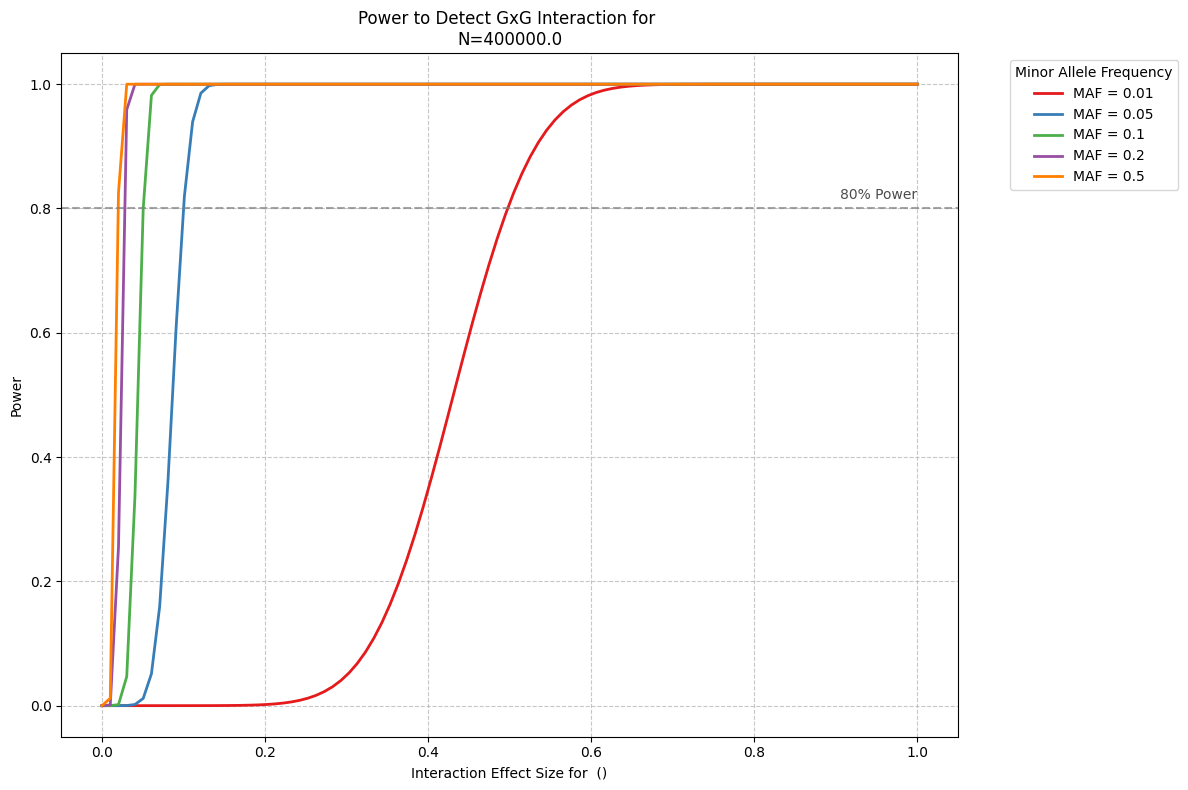

In [7]:
beta1 = 0.01
beta2 = 0.01
interaction_effects = np.linspace(0, 1, 100)  # Now in units of standard deviations
maf_list = [0.01, 0.05, 0.1, 0.2, 0.5]

generate_power_curve_gxg('', '', 0, 1, 4e5, maf_list, beta1, beta2, interaction_effects)